# Bogdanov-Takens normal form

The universal unfolding for the Bogdanov-Takens normal form is given by

```{math}
:label: eq:BogdanovTakensNormalForm
\begin{cases}
\begin{aligned}
\dot w_0 &= w_1, \\
\dot w_1 &= \beta_1  + \beta_2 w_1 + w_0^2 - w_0 w_1. \\
\end{aligned}
\end{cases}
```

## Overview

In this demo we will

- Compare the profiles of the predicted homoclinic solutions emanating from the
Bogdanov-Takens point with the corrected homoclinic solutions curve in
phase-space. We will do this using the asymptotics derived in
{cite}`Bosschaert@2021` and the asymptotics as provided in
{cite}`Al-Hdaibat@2016`. We will focus on the difference in using the higher
order approximation of the non-linear time transformation.
- Create a convergence plot of the different approximation
derived in {cite}`Bosschaert@2021`. And compare them with the approximation
derived in {cite}`Al-Hdaibat@2016`.

This demo will not show how to continue the homoclinic curve emanating from the
codimension two Bogdanov-Takens point. For this we refer to one of the other
demos.

## Load MatCont

Before we can start using __MatCont__ we need to add the main directory of
__MatCont,__ as well as various subdirectories of __MatCont,__ to the _MATLAB
search path_. This is done in the code below. The variable `matcont_home`
should point to the main directory of __MatCont.__

In [1]:
clear all
matcontpath = '../../';
restoredefaultpath
addpath(matcontpath)
addpath([matcontpath, 'Systems'])
addpath([matcontpath, 'Equilibrium'])
addpath([matcontpath, 'LimitPoint'])
addpath([matcontpath, 'LimitPointCycle'])
addpath([matcontpath, 'Hopf'])
addpath([matcontpath, 'Homoclinic'])
addpath([matcontpath, 'LimitCycle'])
addpath([matcontpath, 'Continuer'])
addpath([matcontpath, 'MultilinearForms'])
addpath([matcontpath, 'Utilities'])
set(groot, 'defaultTextInterpreter', 'LaTeX');
set(0,'defaultAxesFontSize',15)

## Set the odefile

Next we set the variable `odefile` to the _system file_ previously generated by
the notebook [](./BogdanovTakensNormalFormGenSym.ipynb).

In [2]:
odefile=@BogdanovTakensNormalForm;

## Define Bogdanov-Takens point

In [3]:
w0 = 0;
w1 = 0;
beta1 = 0;
beta2 = 0;
bt.x = [w0; w1];
bt.par = [beta1; beta2];

To refer to the parameters throughout the script we create a __cell array__ of
strings containing the parameter names. This is then converted into a
__struct__. This allows us to refer to the parameters as `ind.parametername`,
similar as done in _DDE-BifTool_.

In [4]:
parnames = {'beta1', 'beta2'};
cind = [parnames;num2cell(1:length(parnames))];
ind  = struct(cind{:});

## Lindstedt-Poincaré with and without higher order time approximation

Here we will show that it is essential to use the higher order approximation of
the non-linear time transformation as derived in {cite}`Bosschaert@2021`. This
was not taken into account in {cite}`Al-Hdaibat@2016`.

BT normal form coefficients:
a=-1,	 b=1
T: 5.04286
The initial perturbation parameter:  1
The initial distance time eps0: 0.00144308
The initial distance time eps1: 0.00485318
BT normal form coefficients:
a=-1,	 b=1
T: 5.04286
The initial perturbation parameter:  1
The initial distance time eps0: 0.112165
The initial distance time eps1: 4.58758e-08


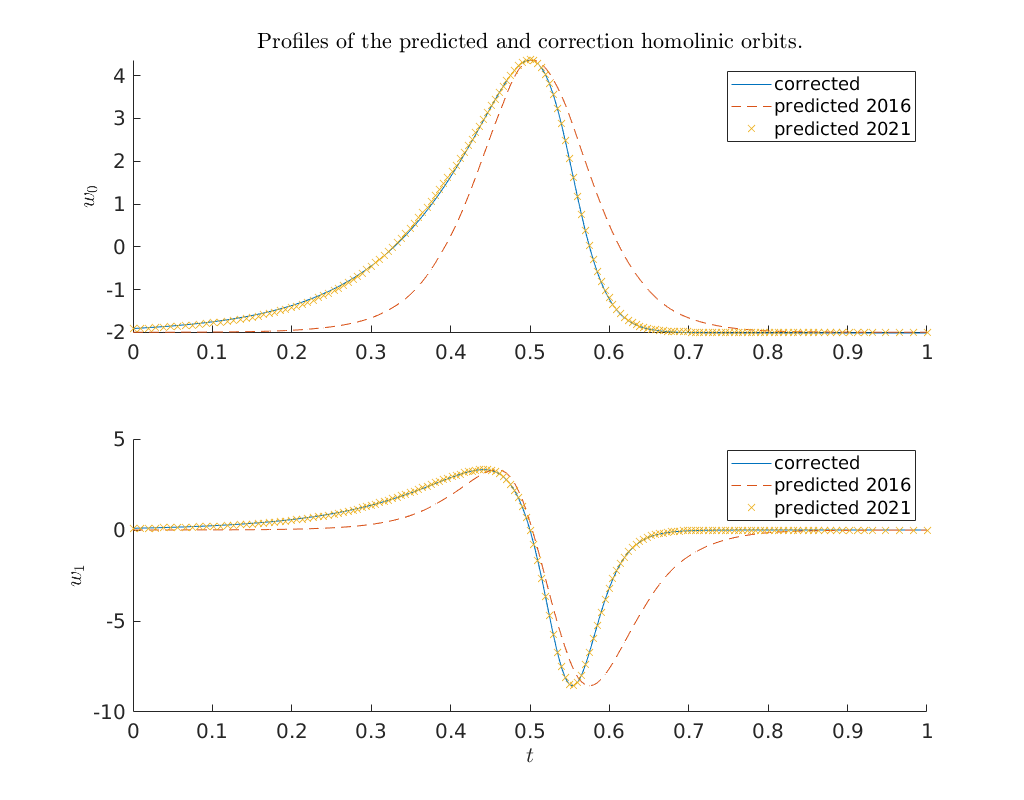

In [5]:
%plot --width 1024 --height 800
ap = [ind.beta1, ind.beta2];
BToptions = BT_Hom_set_options();
BToptions.method = 'LP';
BToptions.HigherOrderTimeReparametrization = 0;
BToptions.correct = 0;
BToptions.amplitude = 6;
BToptions.TTolerance = 1.0e-03;
hom2016pred = init_BT_Hom(odefile, bt,  ap, BToptions);
BToptions.HigherOrderTimeReparametrization = 1;
[hom2021pred, hom_v_pred] = init_BT_Hom(odefile, bt,  ap, BToptions);
homcorrected = newtcorr(hom2021pred, hom_v_pred);
global homds
[hom2016predOrbit, saddle2016pred] = bt_rearr(hom2016pred);
[hom2021predOrbit, saddle2021pred] = bt_rearr(hom2021pred);
[homcorrectedOrbit, saddlecorrected] = bt_rearr(homcorrected);
subplot(2,1,1); hold on;
title('Profiles of the predicted and correction homolinic orbits.')
plot(homds.finemsh, homcorrectedOrbit(1:2:end),'-')
plot(homds.finemsh, hom2016predOrbit(1:2:end),'--')
plot(homds.finemsh, hom2021predOrbit(1:2:end),'x')
legend({'corrected', 'predicted 2016', 'predicted 2021'})
ylabel('$w_0$')
subplot(2,1,2); hold on;
plot(homds.finemsh, homcorrectedOrbit(2:2:end),'-')
plot(homds.finemsh, hom2016predOrbit(2:2:end),'--')
plot(homds.finemsh, hom2021predOrbit(2:2:end),'x')
legend({'corrected', 'predicted 2016', 'predicted 2021'})
ylabel('$w_1$')
xlabel('$t$')

## Compare predictor and corrected solution in $(w_0, w_1)$ phase-space

The plot below shows that both predicted homoclinic orbits are in excellent
agreement in $(w_0, w_1)$ phase-space. However, this is not on which the Newton
iteration operates. It operates on the profiles as shown above.

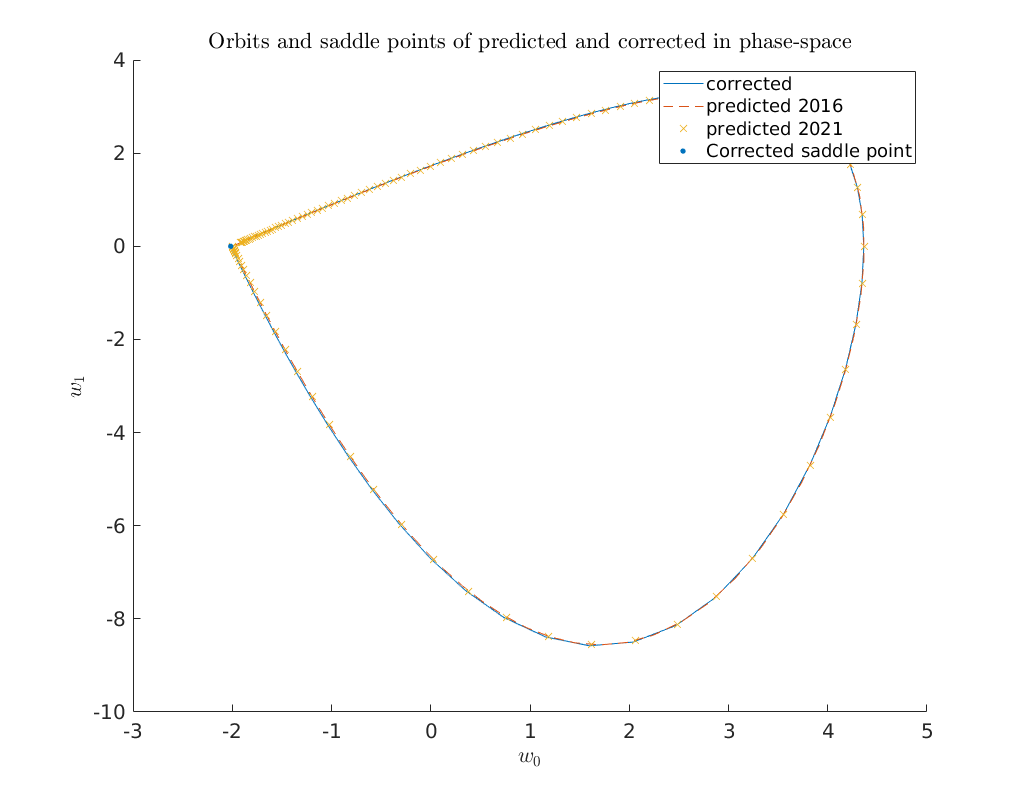

In [6]:
hold on
plot(homcorrectedOrbit(1:2:end),homcorrectedOrbit(2:2:end), '-')
plot(hom2016predOrbit(1:2:end),hom2016predOrbit(2:2:end),'--')
plot(hom2021predOrbit(1:2:end),hom2021predOrbit(2:2:end),'x')
plot(saddlecorrected(1), saddlecorrected(2), '.', 'MarkerSize', 12, 'Color', [0 0.4470 0.7410])
xlabel('$w_0$')
ylabel('$w_1$')
legend({'corrected', 'predicted 2016', 'predicted 2021', 'Corrected saddle point'})
title('Orbits and saddle points of predicted and corrected in phase-space')

## Convergence plots

Below we show a log-log convergence plot comparing the different
higher order homoclinic approximation methods derived in {cite}`Bosschaert@2021`
to approximate the homoclinic solutions near the Bogdanov-Takens point.
On the abscissa is the amplitude $A_0$ and on the ordinate the relative error
$\delta$ between the constructed solution (`x_pred`) to the defining system for the
homoclinic orbit and the Newton corrected solution (`x_corrected`).
We will also plot the third order predictor as derived in
{cite}`Al-Hdaibat@2016`. It is shown that it only provides zeroth-order
accuracy.

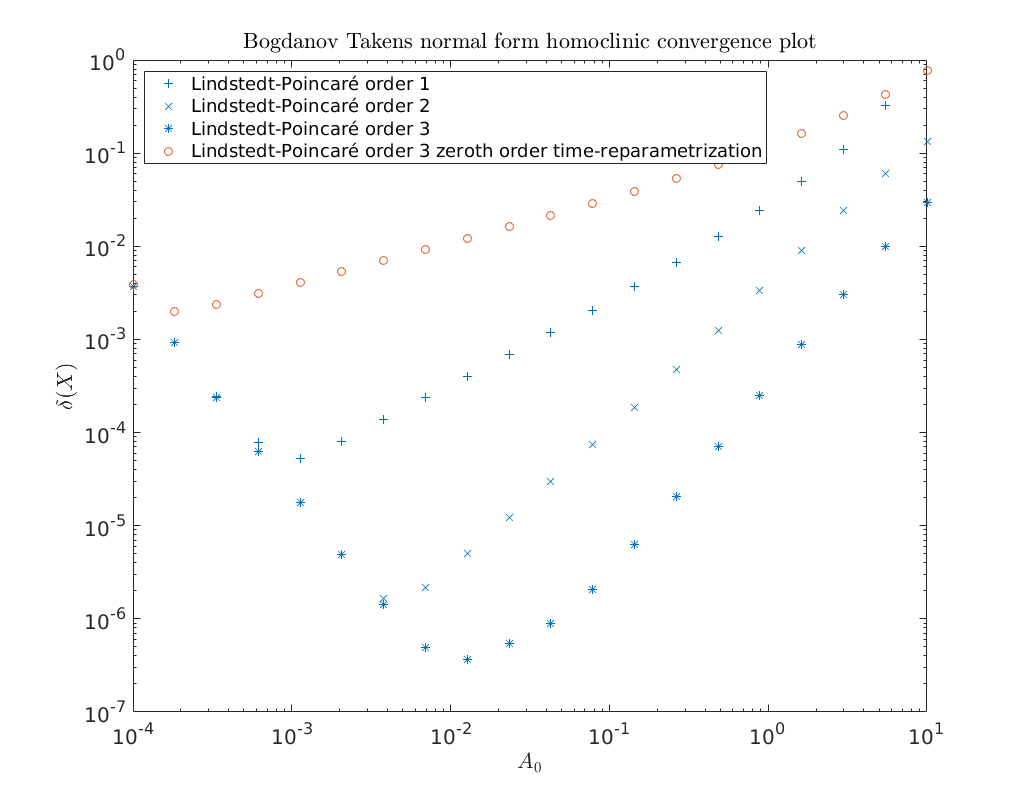

In [7]:
BToptions = BT_Hom_set_options();
BToptions.TTolerance = 1e-05;
BToptions.messages = false;
BToptions.correct = false;

amplitudes = logspace(-4, 1, 20);

BToptions.method = 'LP';
relativeErrors = {};
for i=1:3
    relativeErrors{i} = zeros(size(amplitudes));
    BToptions.order = i;
    for j=1:length(amplitudes)
        BToptions.amplitude = amplitudes(j);
        [x_pred, v0] = init_BT_Hom(odefile, bt, ap, BToptions);
        try
            x_corrected = newtcorr(x_pred, v0);
            relativeErrors{i}(j) = norm(x_corrected-x_pred)/norm(x_corrected);
        catch
            warning('Did not converge.')
            continue
        end
  end
end

i=4;
relativeErrors{i} = zeros(size(amplitudes));
BToptions.HigherOrderTimeReparametrization = 0;
for j=1:length(amplitudes)
    BToptions.amplitude = amplitudes(j);
    [x_pred, v0] = init_BT_Hom(odefile, bt, ap, BToptions);
    try
        x_corrected = newtcorr(x_pred, v0);
        relativeErrors{i}(j) = norm(x_corrected-x_pred)/norm(x_corrected);
    catch
        warning('Did not converge.')
        continue
    end
end

cm = lines();
loglog(amplitudes, relativeErrors{1}(:), '+', ...
       amplitudes, relativeErrors{2}(:), 'x', ...
       amplitudes, relativeErrors{3}(:), '*', ...
       amplitudes, relativeErrors{4}(:), 'o')
legend('Lindstedt-Poincaré order 1', 'Lindstedt-Poincaré order 2', ...
'Lindstedt-Poincaré order 3', ...
'Lindstedt-Poincaré order 3 zeroth order time-reparametrization', 'Location', 'NorthWest')
title('Bogdanov Takens normal form homoclinic convergence plot')
xlabel('$A_0$')
ylabel('$\delta(X)$')
ax = gca;
ax.ColorOrder = [cm(1,:); cm(1,:); cm(1,:); cm(2,:); cm(5,:)];

We finish this notebook with a convergence plot as above. This time we show
that the $L2$ phase-condition provides better accuracy then  the phase-condition
used in {cite}`Al-Hdaibat@2016`. However, as stated in {cite}`Bosschaert@2021`
these results do not lift to the central manifold of a general system.

Also shown is that the Lindstedt-Poincaré method provides a much better
approximation here then either one of the regular perturbation methods.
This however doens't hold true for the first order correction.

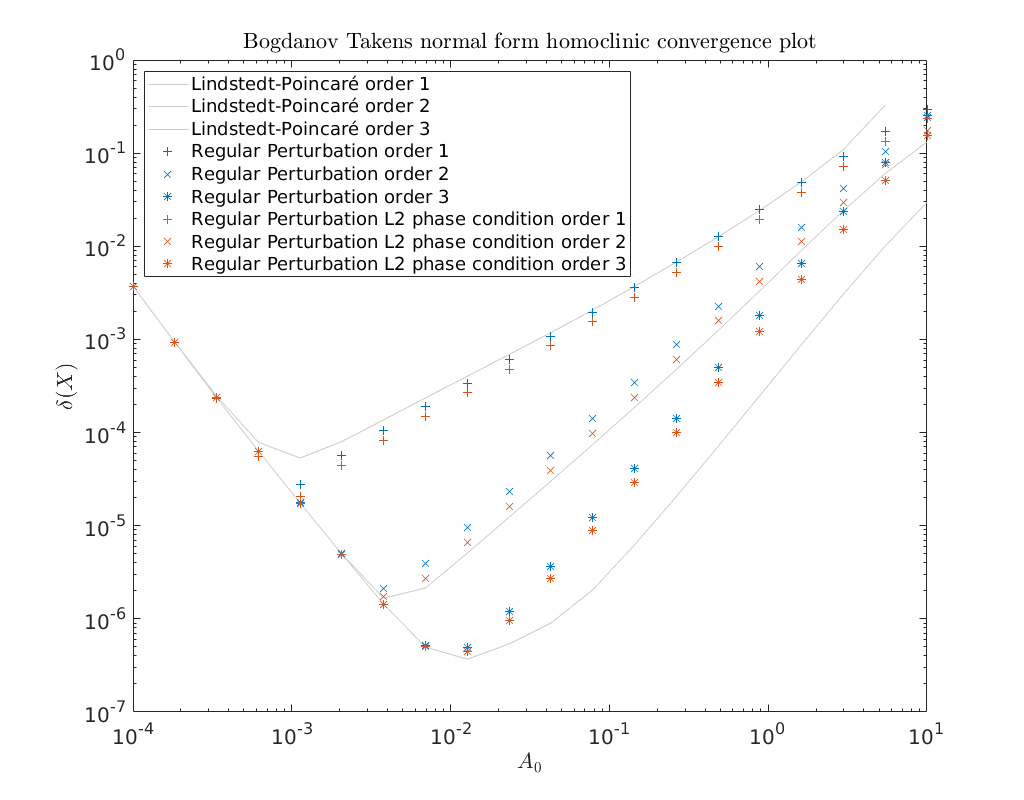

In [8]:
BToptions = BT_Hom_set_options();
BToptions.TTolerance = 1e-05;
BToptions.messages = false;
BToptions.correct = false;

amplitudes = logspace(-4, 1, 20);
methodList = {'LP', 'RegularPerturbation', 'RegularPerturbationL2'};

relativeErrors = {};
for i=1:3
    for k=1:length(methodList)
        relativeErrors{i,k} = zeros(size(amplitudes));
        BToptions.order = i;
        BToptions.method = methodList{k}; 
        for j=1:length(amplitudes)
            BToptions.amplitude = amplitudes(j);
            [x_pred, v0] = init_BT_Hom(odefile, bt, ap, BToptions);
            try
                x_corrected = newtcorr(x_pred, v0);
                relativeErrors{i,k}(j) = norm(x_corrected-x_pred)/norm(x_corrected);
            catch
                warning('Did not converge.')
                continue
            end
        end
    end
end

clf
cm = lines();
loglog(amplitudes, relativeErrors{1,1}(:), '-', ...
       amplitudes, relativeErrors{2,1}(:), '-', ...
       amplitudes, relativeErrors{3,1}(:), '-', ...
       amplitudes, relativeErrors{1,2}(:), '+', ...
       amplitudes, relativeErrors{2,2}(:), 'x', ...
       amplitudes, relativeErrors{3,2}(:), '*', ...
       amplitudes, relativeErrors{1,3}(:), '+', ...
       amplitudes, relativeErrors{2,3}(:), 'x', ...
       amplitudes, relativeErrors{3,3}(:), '*')
legend('Lindstedt-Poincaré order 1', 'Lindstedt-Poincaré order 2', ...
'Lindstedt-Poincaré order 3', ...
'Regular Perturbation order 1','Regular Perturbation order 2', ...
'Regular Perturbation order 3', ...
'Regular Perturbation L2 phase condition order 1', ...
'Regular Perturbation L2 phase condition order 2', ...
'Regular Perturbation L2 phase condition order 3', ...
'Location', 'NorthWest')
title('Bogdanov Takens normal form homoclinic convergence plot')
xlabel('$A_0$')
ylabel('$\delta(X)$')
ax = gca;
gray = [0.8 0.8 0.8];
ax.ColorOrder = [gray; gray; gray; cm(1,:); cm(1,:); cm(1,:); ...
                 cm(2,:); cm(2,:); cm(2,:)];